## Вариант 6
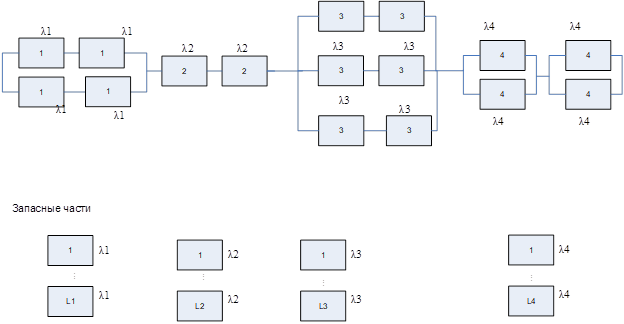

$ {m = 4; λ_1 = 40*10^{-6}, λ_2 = 10*10^{-6}, λ_3 = 80*10^{-6}, λ_4 = 30*10^{-6} 1/ч; P^0 = 0.995, T = 8760 ч } $

$ p = 0.995, ε = 0.005 ,$

$ t_α = 2.576, $

$ N = t_α^2 * \frac{p * (1 - p)}{ε} = 6.636 * \frac{0.995 * (1 - 0.995)}{0.005} = 1320 $

$ LFRS = ((x_1 ∧ x_2) ∨ (x_3 ∧ x_4)) ∧ x_5 ∧ x_6 ∧ ((x_7 ∧ x_8) ∨ (x_9 ∧ x_{10}) ∨ (x_{11} ∧ x_{12})) ∧ (x_{13} ∨ x_{14}) ∧ (x_{15} ∨ x_{16}) $

In [5]:
def func(x: list) -> bool:
     T = 8760
     return ((((x[0] > T) & (x[1] > T)) | ((x[2] > T) & (x[3] > T)))
          & (x[4] > T) 
          & (x[5] > T)
          & (((x[6] > T) & (x[7] > T)) | ((x[8] > T) & (x[9] > T)) | ((x[10] > T) & (x[11] > T)))
          & (((x[12] > T) | (x[13] > T))) 
          & (((x[14] > T) | (x[15] > T))))

In [6]:
def generate_spare_parts() -> list:
    L = []
    for i0 in range(1, 10):
        for i1 in range(1, 10):
            for i2 in range(1, 10):
                for i3 in range(1, 10):
                    L.append([i0, i1, i2, i3])
    return L

In [7]:
from math import log
from random import random

def algorithm(N: int, m: int, L: list) -> float:
    lambdaf = (40e-6, 10e-6, 80e-6, 30e-6)
    c = (4, 2, 6, 4)
    d = 0
    for _ in range(N):
        x = []
        for i in range(m):
            t = [-log(random()) / lambdaf[i] for _ in range(c[i])]
            for _ in range(L[i]):
                index_of_min = t.index(min(t))
                t[index_of_min] = t[index_of_min] - log(random()) / lambdaf[i]
            for k in range(c[i]):
                x.append(t[k])
        if not func(x):
            d += 1
    return (1 - d / N)

In [8]:
import scipy.stats as stats
p = 0.995
eps = 0.005
t_a = stats.norm.ppf(p)
N = int(t_a**2 * (p * (1 - p) / eps**2))
m=4

L = generate_spare_parts()
results = []
for l in L:
    res = algorithm(N, m, l)
    if res > p:
        results.append((res, p, l, sum(l)))
sorted(results, key=lambda x: x[3])

[(0.9954545454545455, 0.995, [4, 2, 7, 4], 17),
 (0.9962121212121212, 0.995, [4, 2, 8, 3], 17),
 (0.996969696969697, 0.995, [4, 2, 7, 5], 18),
 (0.9962121212121212, 0.995, [4, 3, 8, 3], 18),
 (0.9962121212121212, 0.995, [5, 2, 7, 4], 18),
 (0.996969696969697, 0.995, [5, 3, 7, 3], 18),
 (0.9977272727272727, 0.995, [4, 2, 8, 5], 19),
 (0.996969696969697, 0.995, [4, 2, 9, 4], 19),
 (0.9954545454545455, 0.995, [4, 3, 8, 4], 19),
 (0.996969696969697, 0.995, [4, 3, 9, 3], 19),
 (0.9962121212121212, 0.995, [4, 4, 8, 3], 19),
 (0.9962121212121212, 0.995, [5, 2, 7, 5], 19),
 (0.9954545454545455, 0.995, [5, 2, 8, 4], 19),
 (0.9992424242424243, 0.995, [5, 2, 9, 3], 19),
 (0.9977272727272727, 0.995, [5, 3, 7, 4], 19),
 (0.996969696969697, 0.995, [5, 3, 8, 3], 19),
 (0.9962121212121212, 0.995, [5, 4, 7, 3], 19),
 (0.996969696969697, 0.995, [6, 2, 8, 3], 19),
 (0.9962121212121212, 0.995, [6, 3, 7, 3], 19),
 (0.996969696969697, 0.995, [4, 2, 8, 6], 20),
 (0.9984848484848485, 0.995, [4, 2, 9, 5], 20),